In [54]:
%run Imports.ipynb

In [55]:
conf = pyspark.SparkConf()
spark = SparkSession.builder.appName("Rank").getOrCreate()

In [56]:
df1=spark.read.parquet("/Users/Yashasvi/Documents/CleanDuneData/*")

In [57]:
df1.count()

3898970

In [58]:
df1.createOrReplaceTempView("Load")

Main Query

In [59]:
df_all = spark.sql("SELECT * FROM ( SELECT n1.buyer, n1.original_currency, n1.nft_token_id, n1.nft_contract_address, n1.original_amount as Bought, n2.original_amount as Sold, n1.block_time as Bought_Timestamp, n2.block_time as Sold_Timestamp,n1.usd_amount as Bought_amount, n2.usd_amount as Sold_amount, (n2.usd_amount - n1.usd_amount) as net, n1.platform as n1platform, n2.platform as n2platform FROM Load n1, Load n2 where n1.buyer = n2.seller AND  n2.block_time > n1.block_time AND  n1.nft_token_id is not null AND n1.nft_token_id = n2.nft_token_id AND n1.nft_contract_address = n2.nft_contract_address) holdings")

In [60]:
df_all.columns

['buyer',
 'original_currency',
 'nft_token_id',
 'nft_contract_address',
 'Bought',
 'Sold',
 'Bought_Timestamp',
 'Sold_Timestamp',
 'Bought_amount',
 'Sold_amount',
 'net',
 'n1platform',
 'n2platform']

In [61]:
df_all.schema

StructType(List(StructField(buyer,StringType,true),StructField(original_currency,StringType,true),StructField(nft_token_id,StringType,true),StructField(nft_contract_address,StringType,true),StructField(Bought,DoubleType,true),StructField(Sold,DoubleType,true),StructField(Bought_Timestamp,TimestampType,true),StructField(Sold_Timestamp,TimestampType,true),StructField(Bought_amount,DoubleType,true),StructField(Sold_amount,DoubleType,true),StructField(net,DoubleType,true),StructField(n1platform,StringType,true),StructField(n2platform,StringType,true)))

In [15]:
type(df_all)

pyspark.sql.dataframe.DataFrame

In [62]:
df_all.select('buyer','Bought_amount','Sold_amount','net').show(20)

+--------------------+-------------+------------+-------------------+
|               buyer|Bought_amount| Sold_amount|                net|
+--------------------+-------------+------------+-------------------+
|\x0000005c7dc69d4...|    837.48308|    1078.273| 240.78991999999994|
|\x00003e81818a2f1...|   125.698549|  173.522188|          47.823639|
|\x0005bb8bdcbbf4a...|     775.9004|   1133.2491|           357.3487|
|\x00079e801ad1382...|    178.37568|   1289.0346| 1110.6589199999999|
|\x000cd27f10dffac...|     1405.935|   55277.167|          53871.232|
|\x000cef8f0ab0a2f...|    694.86968|1094.2062762| 399.33659620000003|
|\x000e0ed8a7307e1...|      905.931|   519.35032|-386.58068000000003|
|\x00110e09134aec0...|   200.720832|   188.68224|-12.038591999999994|
|\x00110e09134aec0...|   200.720832|  250.395432|            49.6746|
|\x00110e09134aec0...|   200.720832|   278.09376|  77.37292799999997|
|\x00110e09134aec0...|   200.720832|  248.424224|  47.70339200000001|
|\x00110e09134aec0..

# Ranking 1 - average amount spent (here profit , loss automatically done)

23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:30 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:31 WARN RowBasedKeyValueBatch: Calling spill() on

                                             buyer    avg_spent  Score1
0       \x006b82530c7985fd0084382e866db39a6c5c0578  -252.267914      27
1       \x014fd068938fa1965be36a9244ddf6d37f6b88cb    89.940925      27
2       \x01981e7284ade335883f75927fae1b70fac44d71  -128.700244      27
3       \x0312b9e6627d9a49cf07a3b5af1f18ad8d8e39db  1866.865157      27
4       \x05379b307e6ae02e522fb134fad1254a4e7fbac1   -80.200510      27
...                                            ...          ...     ...
186030  \xe25cf7322526cfef5ca841deb14323f9ada1234a  1839.846200      27
186031  \xe282780e50937a2490831e4539bbb5f3f564e004  -588.149493      27
186032  \xe73a7a0d3163d12ddf749c97433fac227e4cec3d   137.396000      27
186033  \xed1efb8184a6d9498e98695087da3903376b925a -3484.871500      27
186034  \xf49b67a2b2fc0904cb12a2c41c7d2007841c04a0    97.844091      27

[186035 rows x 3 columns]
[ 27  26  29  28  23  30  37  19  40  22  24  33  32  25  54  35  14  92
  39  31  34  21  18  36  45  44  38

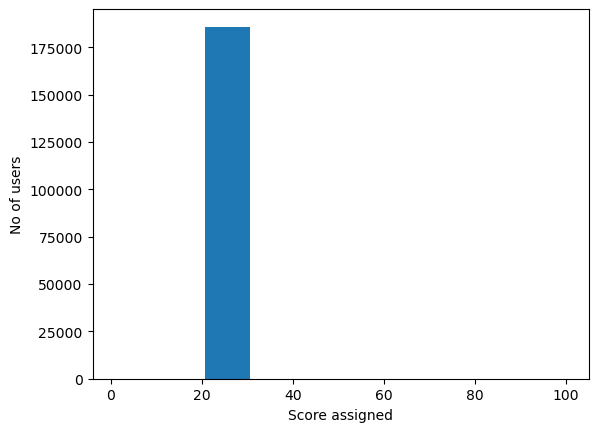

/Users/yashasvi/opt/anaconda3/envs/itp/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [63]:
df_avg = df_all.groupBy("buyer").agg(avg("net").alias("avg_spent"))
# score1 based on avg_spent
df_rule_avg_spent_pd=df_avg.toPandas()
hist, bins=pd.cut(df_rule_avg_spent_pd['avg_spent'],bins=100,labels=False,retbins=True,right=False)
df_rule_avg_spent_pd['Score1']=hist
df_rule_avg_spent_pd['Score1']+=1
print(df_rule_avg_spent_pd)
print(df_rule_avg_spent_pd['Score1'].unique())
plt.hist(df_rule_avg_spent_pd["Score1"])
plt.xlabel("Score assigned")
plt.ylabel("No of users")
plt.title("")
plt.show()
#converting to sparkdf
df_rule_avg_spent=spark.createDataFrame(df_rule_avg_spent_pd)

In [64]:
# # import seaborn as sns
# df_rule_avg_spent_pd['avg_spent'].plot.kde()
# plt.xlabel('avg_spent')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(-25000,25000)
# plt.show()
# df_rule_avg_spent_pd['Score1'].plot.kde()
# plt.xlabel('Score')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(26.75,27.25)
# plt.show()

# # sns.kdeplot(data=df_rule_avg_spent_pd, x='avg_spent')
# # sns.set_xlim(0,2)
# # plt.show()

# Ranking 2 - number of transactions

In [65]:
df_count = df_all.groupBy("buyer").agg(count("*").alias("number_txns"))
# score2 based on number_txns
df_rule_number_txns_pd=df_count.toPandas()
hist, bins=pd.cut(df_rule_number_txns_pd['number_txns'],bins=100,labels=False,retbins=True,right=False)
df_rule_number_txns_pd['Score2']=hist
df_rule_number_txns_pd['Score2']+=1
print(df_rule_number_txns_pd)
#print unique score2 values assigned
print(df_rule_number_txns_pd['Score2'].unique())
#converting to sparkdf
df_rule_number_txns=spark.createDataFrame(df_rule_number_txns_pd)

23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:43:49 WARN RowBasedKeyValueBatch: Calling spill() on

                                             buyer  number_txns  Score2
0       \x006b82530c7985fd0084382e866db39a6c5c0578           12       2
1       \x014fd068938fa1965be36a9244ddf6d37f6b88cb           19       3
2       \x01981e7284ade335883f75927fae1b70fac44d71           18       3
3       \x0312b9e6627d9a49cf07a3b5af1f18ad8d8e39db            6       1
4       \x03a3da04bd4a888ed473a9c6bd90a13165f78e72            1       1
...                                            ...          ...     ...
186030  \xe0d3851eb01cde810436a054f4211e31a2fe0a82            1       1
186031  \xe25cf7322526cfef5ca841deb14323f9ada1234a            1       1
186032  \xe282780e50937a2490831e4539bbb5f3f564e004            2       1
186033  \xe73a7a0d3163d12ddf749c97433fac227e4cec3d            1       1
186034  \xf49b67a2b2fc0904cb12a2c41c7d2007841c04a0            1       1

[186035 rows x 3 columns]
[  2   3   1   5   8   4   6  12   9  17  10  11  26  15   7  19  20  14
  13  22  29  30  38  27  21  54  18

/Users/yashasvi/opt/anaconda3/envs/itp/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [66]:
# df_rule_number_txns_pd['number_txns'].plot.kde()
# plt.xlabel('Number of Transactions')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,50)
# plt.show()

# df_rule_number_txns_pd['Score2'].plot.kde()
# plt.xlabel('Score')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,10)
# plt.show()

# Diversity Ranking 3 - Number of Nft contract address held

In [67]:
df_num_nftcontract = df_all.groupBy("buyer").agg(count("nft_contract_address").alias("num_nftcontract"))
# score3 based on num_nftcontract
df_rule_num_nftcontract_pd=df_num_nftcontract.toPandas()
hist, bins=pd.cut(df_rule_num_nftcontract_pd['num_nftcontract'],bins=100,labels=False,retbins=True,right=False)
df_rule_num_nftcontract_pd['Score3']=hist
df_rule_num_nftcontract_pd['Score3']+=1
print(df_rule_num_nftcontract_pd)
#print unique score3 values assigned
print(df_rule_num_nftcontract_pd['Score3'].unique())
#converting to sparkdf
df_rule_num_nftcontract=spark.createDataFrame(df_rule_num_nftcontract_pd)

23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:05 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:06 WARN RowBasedKeyValueBatch: Calling spill() on

                                             buyer  num_nftcontract  Score3
0       \x006b82530c7985fd0084382e866db39a6c5c0578               12       2
1       \x014fd068938fa1965be36a9244ddf6d37f6b88cb               19       3
2       \x01981e7284ade335883f75927fae1b70fac44d71               18       3
3       \x0312b9e6627d9a49cf07a3b5af1f18ad8d8e39db                6       1
4       \x03a3da04bd4a888ed473a9c6bd90a13165f78e72                1       1
...                                            ...              ...     ...
186030  \xe0d3851eb01cde810436a054f4211e31a2fe0a82                1       1
186031  \xe25cf7322526cfef5ca841deb14323f9ada1234a                1       1
186032  \xe282780e50937a2490831e4539bbb5f3f564e004                2       1
186033  \xe73a7a0d3163d12ddf749c97433fac227e4cec3d                1       1
186034  \xf49b67a2b2fc0904cb12a2c41c7d2007841c04a0                1       1

[186035 rows x 3 columns]
[  2   3   1   5   8   4   6  12   9  17  10  11  26  15   7 

/Users/yashasvi/opt/anaconda3/envs/itp/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [68]:
# df_rule_num_nftcontract_pd['num_nftcontract'].plot.kde()
# plt.xlabel('Number of NFT contracts owned')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,50)
# plt.show()

# df_rule_num_nftcontract_pd['Score3'].plot.kde()
# plt.xlabel('Score')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,10)
# plt.show()

# Diversity Ranking 4 - Number of unique currencies transaction done in

In [69]:
unique_names = df_all.select(col("original_currency")).distinct().rdd.flatMap(lambda x: x).collect()

In [70]:
# df_currency = df_all.groupBy("buyer").agg(countDistinct("original_currency").alias("num_currency")).orderBy(desc("num_currency"))
df_currency = df_all.groupBy("buyer").agg(countDistinct("original_currency").alias("num_currency"))
# score4 based on num_currency
df_rule_num_currency_pd=df_currency.toPandas()
hist, bins=pd.cut(df_rule_num_currency_pd['num_currency'],bins=100,labels=False,retbins=True,right=False)
df_rule_num_currency_pd['Score4']=hist
df_rule_num_currency_pd['Score4']+=1
print(df_rule_num_currency_pd)
#print unique score4 values assigned
print(df_rule_num_currency_pd['Score4'].unique())
#converting back to spark df
df_rule_num_currency=spark.createDataFrame(df_rule_num_currency_pd)

                                             buyer  num_currency  Score4
0       \x375751f0159c9bb29ec2945a5767bb9d3874712f             1       1
1       \x3bd12ee645be8734170c4e7a86448a410903eaed             1       1
2       \xf9e5db0610350385f83e6290e040fe99365548da             1       1
3       \x1773fb4569491ccd6da5f4eed8359bf61f9bf095             1       1
4       \x890652186e45f7be558eadfdde949307249a47f0             1       1
...                                            ...           ...     ...
186030  \xe73a7a0d3163d12ddf749c97433fac227e4cec3d             1       1
186031  \xb40cab161bf5f5f0669ce661c7d9d6e269461d9a             1       1
186032  \x69942f8e403b9d505e2da8a7a2056d9638805dcd             1       1
186033  \x7a44d5004b9498534c44c5fe21620e183f13546d             1       1
186034  \xc5bd99f6fd29d26beba91a171d519107c6d60201             1       1

[186035 rows x 3 columns]
[  1  34  67 100]


/Users/yashasvi/opt/anaconda3/envs/itp/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [71]:
# df_rule_num_currency_pd['num_currency'].plot.kde()
# plt.xlabel('Number of currencies owned')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,3)
# plt.show()

# df_rule_num_currency_pd['Score4'].plot.kde()
# plt.xlabel('Score')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,50)
# plt.show()

In [22]:
# data_collect = df_all.collect()

# Diversity Ranking 5 - Average Duration (in seconds)

In [72]:
# df_all = df_all.withColumn("duration", (col("Sold_Timestamp") - col("Bought_Timestamp")))
df_all = df_all.withColumn("duration", (unix_timestamp(col("Sold_Timestamp")) - unix_timestamp(col("Bought_Timestamp"))))

In [73]:
df_all.select('duration').show(5)

+--------+
|duration|
+--------+
|  298840|
|   37944|
|   91081|
| 4252760|
| 6705652|
+--------+
only showing top 5 rows



In [74]:
df_avg_duration = df_all.groupBy("buyer").agg(avg("duration").alias("avg_duration"))
# score4 based on num_currency
df_rule_avg_duration_pd=df_avg_duration.toPandas()
hist, bins=pd.cut(df_rule_avg_duration_pd['avg_duration'],bins=100,labels=False,retbins=True,right=False)
df_rule_avg_duration_pd['Score5']=hist
df_rule_avg_duration_pd['Score5']+=1
print(df_rule_avg_duration_pd)
#print unique score5 values assigned
print(df_rule_avg_duration_pd['Score5'].unique())
#converting to sparkdf
df_rule_avg_duration=spark.createDataFrame(df_rule_avg_duration_pd)

23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
23/04/12 14:44:57 WARN RowBasedKeyValueBatch: Calling spill() on

                                             buyer  avg_duration  Score5
0       \x006b82530c7985fd0084382e866db39a6c5c0578  3.849958e+06       5
1       \x014fd068938fa1965be36a9244ddf6d37f6b88cb  1.528443e+06       2
2       \x01981e7284ade335883f75927fae1b70fac44d71  8.420664e+05       1
3       \x0312b9e6627d9a49cf07a3b5af1f18ad8d8e39db  2.391315e+06       3
4       \x03a3da04bd4a888ed473a9c6bd90a13165f78e72  8.280000e+02       1
...                                            ...           ...     ...
186030  \xe0d3851eb01cde810436a054f4211e31a2fe0a82  1.754641e+06       2
186031  \xe25cf7322526cfef5ca841deb14323f9ada1234a  5.060740e+05       1
186032  \xe282780e50937a2490831e4539bbb5f3f564e004  6.212410e+05       1
186033  \xe73a7a0d3163d12ddf749c97433fac227e4cec3d  9.421300e+04       1
186034  \xf49b67a2b2fc0904cb12a2c41c7d2007841c04a0  1.046440e+07      12

[186035 rows x 3 columns]
[  5   2   1   3   9   8   4   6  34  27   7  15  13  17  16  10  12  29
  21  19  14  24  11  18

/Users/yashasvi/opt/anaconda3/envs/itp/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [75]:
# df_rule_avg_duration_pd['avg_duration'].plot.kde()
# plt.xlabel('Average duration')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0e+8,0.50e+8)
# plt.show()

# df_rule_avg_duration_pd['Score5'].plot.kde()
# plt.xlabel('Score')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,50)
# plt.show()

In [26]:
type(df_avg_duration)

pyspark.sql.dataframe.DataFrame

# Ranking 6 - Frequency of each transaction

In [79]:
from pyspark.sql.functions import split
df_all = df_all.withColumn("date", split("Bought_Timestamp", " ")[0])
df_all = df_all.withColumn("time", split("Bought_Timestamp", " ")[1])

In [80]:
df_frequency = df_all.groupBy("buyer").agg(countDistinct("time").alias("frequency"))
df_rule_frequency_pd = df_frequency.toPandas()
hist, bins=pd.cut(df_rule_frequency_pd['frequency'],bins=100,labels=False,retbins=True,right=False)
df_rule_frequency_pd['Score6']=hist
df_rule_frequency_pd['Score6']+=1
print(df_rule_frequency_pd)
#print unique score5 values assigned
print(df_rule_frequency_pd['Score6'].unique())
#converting to sparkdf
df_frequency=spark.createDataFrame(df_rule_frequency_pd)

                                             buyer  frequency  Score6
0       \x2fddb28767a612ce6e76da99a32b1e9a69f8e432          4       6
1       \x79141804d6c87dcb4e7ebb7d8aeb4db782518ec9          4       6
2       \xaa145a17cab61c4bfcfa30d1a80229852f1bdb8c          3       4
3       \xbdbb84bc1d8106b20b7ee96a7227e7544ef1fc2b          2       2
4       \x2821b96b96e8e85dad078eefbd98662a4df8ec0b         10      17
...                                            ...        ...     ...
186030  \xe282780e50937a2490831e4539bbb5f3f564e004          1       1
186031  \xe0d3851eb01cde810436a054f4211e31a2fe0a82          1       1
186032  \xe73a7a0d3163d12ddf749c97433fac227e4cec3d          1       1
186033  \xafee0a90deb063c23b8ca78a19669c09ac53b8c4          1       1
186034  \x3e59244480f4941076aea8d5083dc0309bac2992          1       1

[186035 rows x 3 columns]
[  6   4   2  17   1   8  11  22  24  15   9  13  18  20  29  25  38  34
  27  42  33  43  31  65  70  40  81  54  56  47  52  49  59

/Users/yashasvi/opt/anaconda3/envs/itp/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [82]:
df_frequency.count()

23/04/12 14:45:34 WARN TaskSetManager: Stage 371 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.


186035

In [76]:
# df_rule_frequency_pd['frequency'].plot.kde()
# plt.xlabel('Frequency')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0e+2,0.50e+2)
# plt.show()

# df_rule_frequency_pd['Score6'].plot.kde()
# plt.xlabel('Score')
# plt.ylabel('Density')
# plt.title("")
# plt.xlim(0,50)
# plt.show()

# Feature Extraction for Model

In [27]:
# modeldata = reduce(lambda x,y: pd.merge(x,y, on='buyer', how='outer'), [df_avg, df_count, df_num_nftcontract, df_currency, df_avg_duration])
joined_df = df_avg.join(df_count, on='buyer', how='inner').join(df_num_nftcontract, on='buyer', how='inner').join(df_currency, on='buyer', how='inner').join(df_avg_duration, on='buyer', how='inner')

In [30]:
joined_df.count()

186035

In [77]:
joined_scores = df_rule_avg_spent.join(df_rule_number_txns, on='buyer', how='inner').join(df_rule_num_nftcontract, on='buyer', how='inner').join(df_rule_num_currency, on='buyer', how='inner').join(df_rule_avg_duration, on='buyer', how='inner')
joined_scores.show(5)

23/04/12 14:45:06 WARN TaskSetManager: Stage 346 contains a task of very large size (1280 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:45:07 WARN TaskSetManager: Stage 347 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:45:07 WARN TaskSetManager: Stage 348 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:45:07 WARN TaskSetManager: Stage 349 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:45:08 WARN TaskSetManager: Stage 350 contains a task of very large size (1280 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+-------------------+------+-----------+------+---------------+------+------------+------+------------------+------+
|               buyer|          avg_spent|Score1|number_txns|Score2|num_nftcontract|Score3|num_currency|Score4|      avg_duration|Score5|
+--------------------+-------------------+------+-----------+------+---------------+------+------------+------+------------------+------+
|\x000000000027634...|-1094.1415000000002|    27|          2|     1|              2|     1|           1|     1|         1012977.0|     2|
|\x0000002b94395a5...| 18.830347000000003|    27|          1|     1|              1|     1|           1|     1|           53640.0|     1|
|\x00052fb2f4c461b...|         5686.01735|    27|          2|     1|              2|     1|           2|    34|         1696346.0|     2|
|\x0005bb8bdcbbf4a...| 288.20619921428573|    27|          7|     1|              7|     1|           1|     1|256193.85714285713|     1|
|\x0007a07be3fc1a3...|-305.5206560

In [86]:
joined_scores.count()

23/04/12 14:47:00 WARN TaskSetManager: Stage 387 contains a task of very large size (1280 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:47:00 WARN TaskSetManager: Stage 388 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:47:00 WARN TaskSetManager: Stage 389 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:47:01 WARN TaskSetManager: Stage 390 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:47:01 WARN TaskSetManager: Stage 391 contains a task of very large size (1280 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:47:01 WARN TaskSetManager: Stage 392 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.


186035

In [83]:
joined_scores = joined_scores.join(df_frequency, on='buyer', how='inner')

In [85]:
joined_scores.write.parquet("/Users/yashasvi/Documents/ModelScoresupdated/")


23/04/12 14:46:49 WARN TaskSetManager: Stage 374 contains a task of very large size (1280 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:46:50 WARN TaskSetManager: Stage 375 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:46:50 WARN TaskSetManager: Stage 376 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:46:50 WARN TaskSetManager: Stage 377 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:46:50 WARN TaskSetManager: Stage 378 contains a task of very large size (1280 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:46:50 WARN TaskSetManager: Stage 379 contains a task of very large size (1126 KiB). The maximum recommended task size is 1000 KiB.
23/04/12 14:46:52 WARN MemoryManager: Total allocation exceeds 95.00% (919,443,854 bytes) of heap memory
Scaling row group sizes to 97.86% for